In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
import sklearn.linear_model

import warnings
warnings.filterwarnings("ignore")

from acquire_telco import get_telco_data
from prep_telco import prep_telco_data, split_telco_data, prep_telco_data_only
import explore as ex

# Project Overview

We will be conducting an analysis on customer data for Telco Company. To conceptualize our data we will first be using exporatory data analysis techniques to find key drivers of churn. Next we will be using machine learning algorithms to create a predictive model capable of deciding whether or not a customer will churn. 

# project goals

1. Identify key drivers of churn

2. Create a predictive model to identify possible churn

3. increase profits through customer satisfaction and longevity

# Questions

1. How do monthly charges affect churn?

2. Are senior citizens more likely to churn?

3. Is churn a product of tenure?

4. Do dependants affect churn?

5. Does gender affect churn?

# Acquire

In [30]:
# Retrieves Telco data from CSV file
df = get_telco_data()

# Prepare

### To prepare this data i used the following steps

- Drop duplicate columns

- Drop null values stored as whitespace

- Remove brand new customers

- Convert to correct datatype

- Convert binary categorical variables to numeric

- Get dummies for non-binary categorical variables

- Rejoin dummy dataframe

- Split the data into Train, Validate, and Test

- Drop object Datatypes

In [31]:
train, validate, test = prep_telco_data(df)

### we seperate the data into train, validate, and test for our predictive modeling

- Train: Used for building the model
    
- Validate: Checks the validity of our model and verifies the model is not overfit
    
- Test: Uses unseen data to show how the model performs

# The Data We Have

### Out of the 7032 customers in this dataset

- 1869 have churned, or 27%
- 1142 are senior citizens
- 2099 have dependants
- An average monthly payment is $64.76
- An average tenure of 32 months


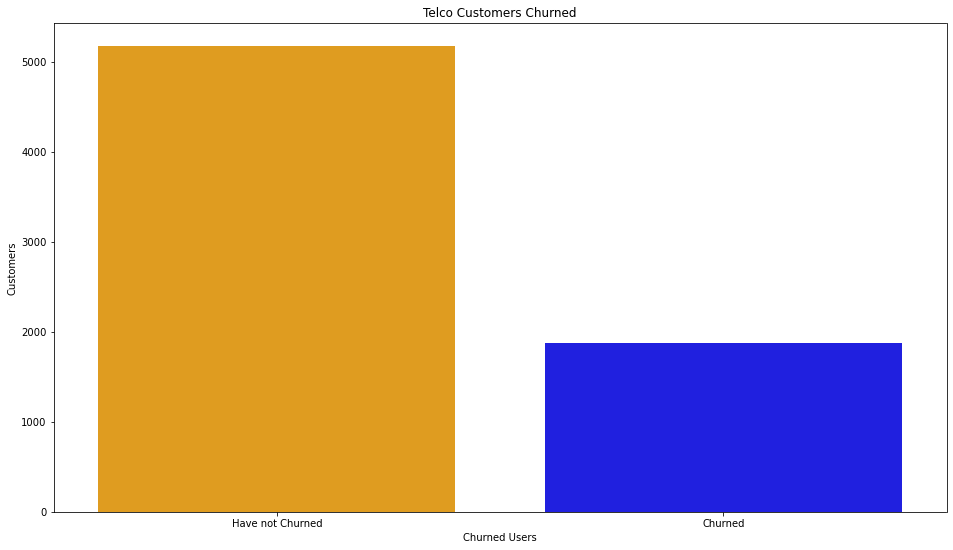

In [32]:
# create df for churn numbers
churn = pd.DataFrame(df.churn.value_counts()).reset_index()

# plot figure with axes showing count of churned users
plt.figure(figsize = (16,9))
sns.barplot(data = churn,x = 'index', y = 'churn', palette=('orange','b'))
plt.title('Telco Customers Churned')
plt.xlabel('Churned Users')
plt.ylabel('Customers')
plt.xticks([0,1], ['Have not Churned','Churned']);

# Exploration

## 1. How do monthly charges affect churn?
 - do customers who churn spend more on average than those who dont?
     - we will groupby and then run a CHI^2 test on monthly charges and churn

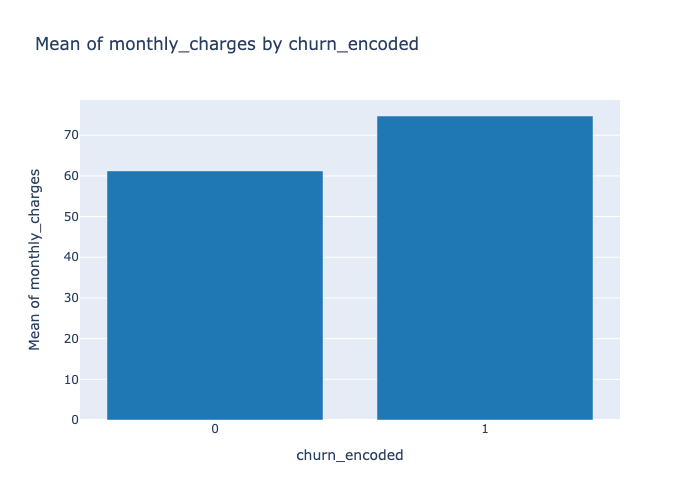

In [33]:
from IPython.display import Image
Image(filename='avg_monthly.png')

#created in Dtale Vizualization library

In [34]:
train.groupby(train.churn_encoded).monthly_charges.mean()

churn_encoded
0    61.218091
1    74.719216
Name: monthly_charges, dtype: float64

In [35]:
ex.chi2_test(train.churn_encoded, train.monthly_charges)

Observed

[[1 1 1 ... 0 2 1]
 [0 0 0 ... 1 0 0]]
------------------
Expected

[[0.7 0.7 0.7 ... 0.7 1.5 0.7]
 [0.3 0.3 0.3 ... 0.3 0.5 0.3]]
------------------

chi^2 = 1582.9468
p     = 0.0000

Reject H0


### customers who churn on average spend more monthly, than those who do not churn




## 2. Are senior citizens more likely to churn?
 - We will be running a CHI^2 test on Senior citizens and churn

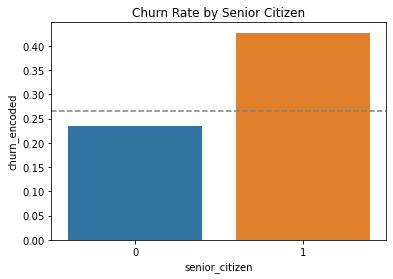

In [36]:
churn_rates = (pd.DataFrame(train.groupby(by='senior_citizen').mean().churn_encoded)
                   .reset_index()
                   .sort_values(by='churn_encoded'))
sns.barplot(data = churn_rates,
                x = 'senior_citizen', 
                y = 'churn_encoded')
plt.axhline(train.churn_encoded.mean(), 
                    ls='--', 
                    color='grey')
plt.title('Churn Rate by Senior Citizen')
plt.show()

In [37]:
ex.chi2_test(train.churn_encoded, train.senior_citizen)

Observed

[[2527  364]
 [ 775  271]]
------------------
Expected

[[2424.7  466.3]
 [ 877.3  168.7]]
------------------

chi^2 = 99.7192
p     = 0.0000

Reject H0


### we rejected the null hypothesis, so there is a significant relationship between senior citizens and churn

## 3. Is churn a product of tenure?

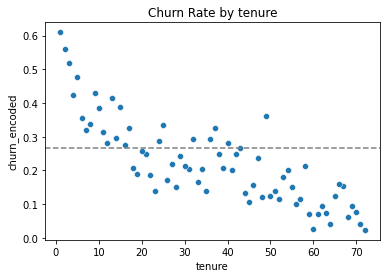

In [38]:
churn_rates = (pd.DataFrame(train.groupby(by='tenure').mean().churn_encoded)
                   .reset_index()
                   .sort_values(by='churn_encoded'))
sns.scatterplot(data = churn_rates,
                x = 'tenure', 
                y = 'churn_encoded')
plt.axhline(train.churn_encoded.mean(), 
                    ls='--', 
                    color='grey')
plt.title('Churn Rate by tenure')
plt.show()

In [39]:
train.groupby(train.churn_encoded).tenure.mean()

churn_encoded
0    38.003459
1    18.325048
Name: tenure, dtype: float64

In [40]:
ex.chi2_test(train.churn_encoded, train.tenure)

Observed

[[137  62  54  60  34  40  51  43  36  43  33  46  38  26  30  29  27  38
   34  29  24  39  37  35  28  39  32  28  28  33  31  29  30  35  37  17
   25  24  23  28  32  30  22  26  34  38  29  36  23  28  25  46  41  28
   34  45  31  26  26  38  39  48  37  46  35  42  50  62  48  49  97 208]
 [214  79  58  44  31  22  24  22  27  27  15  18  27  11  19  11  13  10
    8  10   8   9   6  14  14   8   9   5   9   9   8  12   6   9   6   7
   12   8   6  11   8  10   8   4   4   7   9   5  13   4   4   6   9   7
    6   5   4   7   2   1   3   5   3   2   5   8   9   4   5   4   4   5]]
------------------
Expected

[[257.7 103.5  82.2  76.4  47.7  45.5  55.1  47.7  46.3  51.4  35.2  47.
   47.7  27.2  36.   29.4  29.4  35.2  30.8  28.6  23.5  35.2  31.6  36.
   30.8  34.5  30.1  24.2  27.2  30.8  28.6  30.1  26.4  32.3  31.6  17.6
   27.2  23.5  21.3  28.6  29.4  29.4  22.   22.   27.9  33.   27.9  30.1
   26.4  23.5  21.3  38.2  36.7  25.7  29.4  36.7  25.7  24.2  20.6  28.

### we reject the null hypothesis, and see that there is correlation between tenure and churn

## 4. Do dependants affect churn

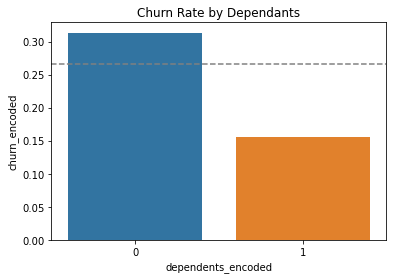

In [41]:
churn_rates = (pd.DataFrame(train.groupby(by='dependents_encoded').mean().churn_encoded)
                   .reset_index()
                   .sort_values(by='churn_encoded'))
sns.barplot(data = churn_rates,
                x = 'dependents_encoded', 
                y = 'churn_encoded')
plt.axhline(train.churn_encoded.mean(), 
                    ls='--', 
                    color='grey')
plt.title('Churn Rate by Dependants')
plt.show()

In [42]:
train.groupby(train.churn_encoded).dependents_encoded.mean()

churn_encoded
0    0.347976
1    0.177820
Name: dependents_encoded, dtype: float64

In [43]:
ex.chi2_test(train.churn_encoded, train.dependents_encoded)

Observed

[[1885 1006]
 [ 860  186]]
------------------
Expected

[[2015.7  875.3]
 [ 729.3  316.7]]
------------------

chi^2 = 104.5425
p     = 0.0000

Reject H0


### we reject the null so we know that there is a correlation between dependents and churn

## 5. Does gender affect churn?

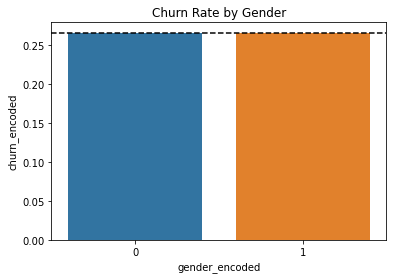

In [44]:
churn_rates = (pd.DataFrame(train.groupby(by='gender_encoded').mean().churn_encoded)
                   .reset_index()
                   .sort_values(by='churn_encoded'))
sns.barplot(data = churn_rates,
                x = 'gender_encoded', 
                y = 'churn_encoded')
plt.axhline(train.churn_encoded.mean(), 
                    ls='--', 
                    color='black')
plt.title('Churn Rate by Gender')
plt.show()

In [45]:
ex.chi2_test(train.churn_encoded, train.gender_encoded)

Observed

[[1451 1440]
 [ 525  521]]
------------------
Expected

[[1451. 1440.]
 [ 525.  521.]]
------------------

chi^2 = 0.0000
p     = 1.0000

Fail to Reject H0


### we faileds to reject the null so we know that there is no correlation between churn and gender

# Modeling

### Creating X and Y sets for modeling

In [46]:

X_train = train.drop(columns=["churn_encoded"])
y_train = train.churn_encoded

X_validate = validate.drop(columns=["churn_encoded"])
y_validate = validate.churn_encoded

X_test = test.drop(columns=["churn_encoded"])
y_test = test.churn_encoded

### Find the baseline

In [47]:
# Create Baseline
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = (y_train == 0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.73


## Baseline accuracy: 73%

## Random Forest

### Train

In [48]:
#make model
forest = RandomForestClassifier(max_depth=6, min_samples_leaf=7, random_state=70)

#fit model on train
forest.fit(X_train, y_train)

#use
#evaluate
y_predictions = forest.predict(X_train)

#produce classification report
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of 6 depth")
pd.DataFrame(report)

Tree of 6 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.831318,0.705056,0.808484,0.768187,0.797772
recall,0.927361,0.479924,0.808484,0.703642,0.808484
f1-score,0.876717,0.571104,0.808484,0.723910,0.795520
support,2891.000000,1046.000000,0.808484,3937.000000,3937.000000


### Validate

In [49]:
y_predictions = forest.predict(X_validate)


#produce classification report
report = classification_report(y_validate, y_predictions, output_dict=True)
print("Tree of 6 depth")
pd.DataFrame(report)

Tree of 6 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.827079,0.650456,0.792654,0.738767,0.780098
recall,0.907183,0.476615,0.792654,0.691899,0.792654
f1-score,0.865281,0.550129,0.792654,0.707705,0.781452
support,1239.000000,449.000000,0.792654,1688.000000,1688.000000


## K - Nearest Neighbor

### Train

In [50]:
# Create features
features3 = ['tenure','monthly_charges', 
             'partner_encoded','total_charges',
             'senior_citizen']
# Create knn model
knn = KNeighborsClassifier(n_neighbors = 7)
# Fit model to predictors and target
knn = knn.fit(X_train[features3], y_train)
# Predict outcomes
y_pred = knn.predict(X_train[features3])
# Probability estimates
y_pred_proba = knn.predict_proba(X_train[features3])

# Print scoring
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      2891
           1       0.73      0.51      0.60      1046

    accuracy                           0.82      3937
   macro avg       0.78      0.72      0.74      3937
weighted avg       0.81      0.82      0.81      3937



### Validate

In [51]:
# Create knn model

# Fit model to predictors and target

# Predict outcomes
y_pred = knn.predict(X_validate[features3])
# Probability estimates
y_pred_proba = knn.predict_proba(X_validate[features3])

# Print scoring
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.85      1239
           1       0.61      0.45      0.51       449

    accuracy                           0.78      1688
   macro avg       0.71      0.67      0.68      1688
weighted avg       0.76      0.78      0.76      1688



## Logistic Regression

### Train

In [52]:
#create LOG regression
logit = LogisticRegression(C=0.01, random_state=70)


# FIT model with specified features
logit = logit.fit(X_train, y_train)

# predict on same subset
y_pred = logit.predict(X_train)

print("Baseline is", round(baseline_accuracy, 2))
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Baseline is 0.73
Accuracy of Logistic Regression classifier on training set: 0.80


### Validate

In [53]:
# predict on same subset
y_pred = logit.predict(X_validate)

print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1239
           1       0.65      0.53      0.58       449

    accuracy                           0.80      1688
   macro avg       0.75      0.71      0.73      1688
weighted avg       0.79      0.80      0.79      1688



### Test

In [54]:
# predict on test
y_pred = logit.predict(X_test)

# probability estimates
y_proba = logit.predict_proba(X_test)

# evaulate on validate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1033
           1       0.68      0.56      0.62       374

    accuracy                           0.81      1407
   macro avg       0.76      0.73      0.75      1407
weighted avg       0.80      0.81      0.81      1407



## Conclusion

Our logistic regression model has performed the best with **81% Accuracy** on future data.

We have also Identified some key predictors of churn as well as an 8% improvement over our baseline.

## Key Items

Attributes that contribute to customer churn:

- Customers are more likely to churn in the first **18 months**

- Churning customers have **higher** monthly charges, on average

- Senior citizens are **more** likely to churn

- People with dependents are **more** likely to churn

## Recomendations

- Batter introductory deals for 1 & 2 year contracts do get customers past the 18 month hump

- market towards families and people with dependants

## Next Steps

With more time I would like to gather more data on regional and economic status, as well as test additional models with more features. with this additional time we should hopefully be able to increase our accuracy to an even higher amount.